In [1]:
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
# import statsmodels.api as sm
import csv
from scipy.stats import poisson
import itertools
import collections
import seaborn as sns

import FACSus as fs

sns.set(style="whitegrid")
# %cd /gpfs3/well/ansari/users/gjx698/BOSON_FACS
%cd ..

/Users/sus_zhang/Desktop/BOSON_FACS


# Reading Baseline FACS data, Filtering outliers, and Generating phenotype files:

In [2]:
def get_phe(col, df, save_name, plot = False, save = False, save_path = None):
    tmp = fs.sanity_check_filter4(df, col, plot = plot, save = save, save_path = save_path)
    fs.get_phenotype(tmp, col, save_name)

In [3]:
# Read dfs and merge
df1 = pd.read_csv('facs/Baseline/Panel1_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df2 = pd.read_csv('facs/Baseline/Panel2_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df3 = pd.read_csv('facs/Baseline/Panel3_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df4 = pd.read_csv('facs/Baseline/Panel4_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df5 = pd.read_csv('facs/Baseline/Panel5_Baseline.csv', sep = ',', dtype = {'Patient ID': 'str'})
df1.iloc[:,1:-9] = df1.iloc[:,1:-9].apply(pd.to_numeric)
df1 = df1.drop(columns = ['Azim data.SUBJID'])
df2.iloc[:, 1:] = df2.iloc[:, 1:].apply(pd.to_numeric)
df3.iloc[:, 1:] = df3.iloc[:, 1:].apply(pd.to_numeric)
df4.iloc[:, 1:] = df4.iloc[:, 1:].apply(pd.to_numeric)
df5.iloc[:, 1:] = df5.iloc[:, 1:].apply(pd.to_numeric)

dfs = [df1, df2, df3, df4, df5]
new_dfs = [df1.copy(), df2.copy(), df3.copy(), df4.copy(), df5.copy()]
for i in range(5):
    new_columns = [dfs[i].columns[0]] + [col + '_panel' + str(i+1) for col in dfs[i].columns[1:]]
    new_dfs[i].columns = new_columns
tmp = pd.merge(new_dfs[0], new_dfs[1], on = 'Patient ID')
tmp = pd.merge(tmp, new_dfs[2], on = 'Patient ID')
tmp = pd.merge(tmp, new_dfs[3], on = 'Patient ID')
df = pd.merge(tmp, new_dfs[4], on = 'Patient ID')
df = df.dropna()
# df['Patient ID'] = 'BOSON' + df['Patient ID']

In [ ]:
# df3 = fs.sanity_check_filter(df3, ['CD4+ TEMRA CD27- CD127+', 'CD4+ TEMRA CD27+ CD127+', 'CD4+ TEMRA CD27+ CD127-', 'CD4+ TEMRA CD27- CD127-'], 
#                           'CD4 TEMRA CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD4+ TEM CD27- CD127+', 'CD4+ TEM CD27+ CD127+', 'CD4+ TEM CD27+ CD127-', 'CD4+ TEM CD27- CD127-'],
#                          'CD4 TEM CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD4+ TCM CD27- CD127+', 'CD4+ TCM CD27+ CD127+', 'CD4+ TCM CD27+ CD127-', 'CD4+ TCM CD27- CD127-'],
#                          'CD4 TCM CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD4+ Naïve CD27- CD127+', 'CD4+ Naïve CD27+ CD127+', 'CD4+ Naïve CD27+ CD127-', 'CD4+ Naïve CD27- CD127-'],
#                          'CD4 Naïve CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ TEMRA CD27- CD127+', 'CD8+ TEMRA CD27+ CD127+', 'CD8+ TEMRA CD27+ CD127-', 'CD8+ TEMRA CD27- CD127-'],
#                          'CD8 TEMRA CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ TEM CD27- CD127+', 'CD8+ TEM CD27+ CD127+', 'CD8+ TEM CD27+ CD127-', 'CD8+ TEM CD27- CD127-'],
#                          'CD8 TEM CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ TCM CD27- CD127+', 'CD8+ TCM CD27+ CD127+', 'CD8+ TCM CD27+ CD127-', 'CD8+ TCM CD27- CD127-'],
#                          'CD8 TCM CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ Naïve CD27- CD127+', 'CD8+ Naïve CD27+ CD127+', 'CD8+ Naïve CD27+ CD127-', 'CD8+ Naïve CD27- CD127-'],
#                          'CD8 Naïve CD27 CD127')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD4+ Naïve CCR7+ CD45RA+', 'CD4+ TEMRA CCR7- CD45RA+', 'CD4+ TCM CCR7+ CD45RA-', 'CD4+ TEM CCR7- CD45RA-'],
#                          'CD4 CCR7 CD45RA')
# df3 = fs.sanity_check_filter(df3, 
#                           ['CD8+ Naïve CCR7+ CD45RA+', 'CD8+ TEMRA CCR7- CD45RA+', 'CD8+ TCM CCR7+ CD45RA-', 'CD8+ TEM CCR7- CD45RA-'],
#                          'CD8 CCR7 CD45RA')
# df = sanity_check_filter2(df, ['Lymphocytes_panel' + str(i+1) for i in range(5)], 'Lymphocytes')
# df = sanity_check_filter2(df, ['Total live_panel' + str(i+1) for i in range(5)], 'Lymphocytes')
# df = sanity_check_filter2(df, ['Live_panel' + str(i+1) for i in range(5)], 'Lymphocytes')

In [ ]:
# Filtering 5 common markers
CD3 = fs.sanity_check_filter(df, ['CD3+_panel1', 'CD3-_panel1'], 'CD3')
CD3 = fs.sanity_check_filter2(CD3, ['CD3+_panel' + str(i+1) for i in range(5)], 'CD3+')
get_phe('CD3+', CD3, 'CD3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+/CD3+_hist")
CD4 = fs.sanity_check_filter2(df, ['CD3+/CD3+CD4+_panel' + str(i+1) for i in range(5)], 'CD3+CD4+')
get_phe('CD3+CD4+', CD4, 'CD3+CD4+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+/CD3+CD4+_hist")
CD8 = fs.sanity_check_filter2(df, ['CD3+/CD3+CD8+_panel' + str(i+1) for i in range(5)], 'CD3+CD8+')
get_phe('CD3+CD8+', CD8, 'CD3+CD8+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+/CD3+CD8+_hist")
CD161 = fs.sanity_check_filter3(df, 'CD3+/CD3+CD8+/CD8+CD161++', 'CD3+CD8+CD161++')
get_phe('CD3+CD8+CD161++', CD161, 'CD3+CD8+CD161++', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CD161++/CD3+CD8+CD161++_hist")
Va72 = fs.sanity_check_filter3(df, 'CD3+/CD3+CD8+/CD8+CD161+Va7.2+', 'CD3+CD8+CD161+Va7.2+')
get_phe('CD3+CD8+CD161+Va7.2+', Va72, 'CD3+CD8+CD161+Va7.2+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CD161+Va7.2+/CD3+CD8+CD161+Va7.2+_hist")

In [ ]:
# Filtering each marker
get_phe('CD3+/CD3+CD8+CD57+', df1, 'CD3+CD57+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD57+/CD3+CD57+_hist")
get_phe('CD3+/DN', df1, 'CD3+DN', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+DN/CD3+DN_hist")
get_phe('CD3-/CD3-CD56+ total', df1, 'CD3-CD56+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3-CD56+/CD3-CD56+_hist")
get_phe('CD3+/CD3+CD4+/CD4+CD38+', df2, 'CD3+CD4+CD38+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CD38+/CD3+CD4+CD38+_hist")
get_phe('CD3+/CD3+CD4+/CD4+GzB+', df2, 'CD3+CD4+GzB+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+GzB+/CD3+CD4+GzB+_hist")
get_phe('CD3+/CD3+CD8+/CD8+ CD38+', df2, 'CD3+CD8+CD38+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CD38+/CD3+CD8+CD38+_hist")
get_phe('CD3+/CD3+CD8+/CD8+ GzB+', df2, 'CD3+CD8+GzB+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+GzB+/CD3+CD8+GzB+_hist")
get_phe('CD4+ TEMRA CCR7- CD45RA+', df3, 'CD3+CD4+CCR7-CD45RA+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CCR7-CD45RA+/CD3+CD4+CCR7-CD45RA+_hist")
get_phe('CD4+ Naïve CCR7+ CD45RA+', df3, 'CD3+CD4+CCR7+CD45RA+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CCR7+CD45RA+/CD3+CD4+CCR7+CD45RA+_hist")
get_phe('CD4+ TCM CCR7+ CD45RA-', df3, 'CD3+CD4+CCR7+CD45RA-', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CCR7+CD45RA-/CD3+CD4+CCR7+CD45RA-_hist")
get_phe('CD4+ TEM CCR7- CD45RA-', df3, 'CD3+CD4+CCR7-CD45RA-', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+CCR7-CD45RA-/CD3+CD4+CCR7-CD45RA-_hist")
get_phe('CD8+ TEMRA CCR7- CD45RA+', df3, 'CD3+CD8+CCR7-CD45RA+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CCR7-CD45RA+/CD3+CD8+CCR7-CD45RA+_hist")
get_phe('CD8+ Naïve CCR7+ CD45RA+', df3, 'CD3+CD8+CCR7+CD45RA+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CCR7+CD45RA+/CD3+CD8+CCR7+CD45RA+_hist")
get_phe('CD8+ TEM CCR7- CD45RA-', df3, 'CD3+CD8+CCR7-CD45RA-', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CCR7-CD45RA-/CD3+CD8+CCR7-CD45RA-_hist")
get_phe('CD8+ TCM CCR7+ CD45RA-', df3, 'CD3+CD8+CCR7+CD45RA-', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+CCR7+CD45RA-/CD3+CD8+CCR7+CD45RA-_hist")
get_phe('CD3+/CD3+CD4+/LAG3+', df4, 'CD3+CD4+LAG3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+LAG3+/CD3+CD4+LAG3+_hist")
get_phe('CD3+/CD3+CD4+/PD1+', df4, 'CD3+CD4+PD1+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+PD1+/CD3+CD4+PD1+_hist")
get_phe('CD3+/CD3+CD4+/TIGIT+', df4, 'CD3+CD4+TIGIT+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+TIGIT+/CD3+CD4+TIGIT+_hist")
get_phe('CD3+/CD3+CD4+/Tim3+', df4, 'CD3+CD4+Tim3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD4+Tim3+/CD3+CD4+Tim3+_hist")
get_phe('CD3+/CD3+CD8+/LAG3+', df4, 'CD3+CD8+LAG3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+LAG3+/CD3+CD8+LAG3+_hist")
get_phe('CD3+/CD3+CD8+/PD1+', df4, 'CD3+CD8+PD1+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+PD1+/CD3+CD8+PD1+_hist")
get_phe('CD3+/CD3+CD8+/TIGIT+', df4, 'CD3+CD8+TIGIT+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+TIGIT+/CD3+CD8+TIGIT+_hist")
get_phe('CD3+/CD3+CD8+/Tim3+', df4, 'CD3+CD8+Tim3+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+CD8+Tim3+/CD3+CD8+Tim3+_hist")
get_phe('CD3+/CD3+ iNKT+', df5, 'CD3+iNKT+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+iNKT+/CD3+iNKT+_hist")
get_phe('CD3+/CD3+ iNKT+/iNKT+ CD4+', df5, 'CD3+iNKT+CD4+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+iNKT+CD4+/CD3+iNKT+CD4+_hist")
get_phe('CD3+/CD3+ iNKT+/iNKT+ CD8+', df5, 'CD3+iNKT+CD8+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+iNKT+CD8+/CD3+iNKT+CD8+_hist")
get_phe('CD3+/CD3+ PanGd+', df5, 'CD3+PanGd+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+PanGd+/CD3+PanGd+_hist")
get_phe('CD3+/CD3+ PanGd+ Vd1+', df5, 'CD3+PanGd+Vd1+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+PanGd+Vd1+/CD3+PanGd+Vd1+_hist")
get_phe('CD3+/CD3+ PanGd+ Vd2+', df5, 'CD3+PanGd+Vd2+', plot = True, 
        save = True, save_path = "boson_vcf/GWAS_no_transform/CD3+PanGd+Vd2+/CD3+PanGd+Vd2+_hist")

In [ ]:
# Log-transforming 2 markers
tmp = fs.sanity_check_filter4(df5, 'CD3+/CD3+ iNKT+', plot = False)
tmp['CD3+/CD3+ iNKT+'] = np.log(tmp['CD3+/CD3+ iNKT+'] + 1)
fs.plot_hist(tmp, 'CD3+/CD3+ iNKT+', 'logp1', bins = 50, label = False, 
             save = True, save_path = "boson_vcf/GWAS_logp1_transform/CD3+iNKT+/CD3+iNKT+_transformed")
Va72['CD3+CD8+CD161+Va7.2+'] = np.log(Va72['CD3+CD8+CD161+Va7.2+'] + 1)
fs.plot_hist(tmp, 'CD3+CD8+CD161+Va7.2+', 'logp1', bins = 20, label = True, 
             save = True, save_path = "boson_vcf/GWAS_logp1_transform/CD3+CD8+CD161+Va7.2+/CD3+CD8+CD161+Va7.2+_transformed")

In [ ]:
# save dfs
# df.to_csv('facs/Baseline/merged.csv', sep = ',', index = False)
# df.columns

# Prepare `covar.factor.txt` file for GWAS

In [ ]:
df = pd.read_csv('boson_metadata/Boson_data.csv', sep = ',')
df['patient_id'] = 'BOSON' + df['patient_id'].astype(str)

PCs = pd.read_csv('boson_vcf/PCs.txt', header = None, sep = ' ')
PCs.columns = ['FID', 'IID'] + ['PC' + str(i) for i in range(1,21)]
PCs = pd.merge(PCs, df[['patient_id', 'gender', 'age']], left_on = 'FID', right_on = 'patient_id').sort_values(by = 'FID')
PCs = PCs.drop(columns = ['patient_id'] + ['PC' + str(i) for i in range(11, 21)])[['FID', 'IID', 'gender', 'age'] + ['PC' + str(i) for i in range(1, 11)]]
PCs['gender'] = PCs['gender'].apply(lambda x: 1 if x == 'Male' else 2)
PCs.to_csv('boson_vcf/covar.factor.txt', sep = ' ', index = False, header = False, float_format='%.6f')

# Merge boson data to a single file

In [ ]:
VL = pd.read_csv('boson_metadata/boson.VL.csv', sep = ',')
VL['FID'] = 'BOSON' + VL['subid'].astype(str)
VL = VL.drop(columns = 'subid')
cols = VL.columns.tolist()
VL = VL[[cols[-1]] + cols[:-1]]

df = pd.read_csv('boson_metadata/Boson_data.csv', sep = ',')
df['patient_id'] = 'BOSON' + df['patient_id'].astype(str)
df = df.rename(columns = {'patient_id': 'FID'})
df = pd.merge(df, VL, on = 'FID')
df.to_csv('boson_metadata/boson.data.merged.txt', sep = ' ', index = False, header = True)

# Plot PCs

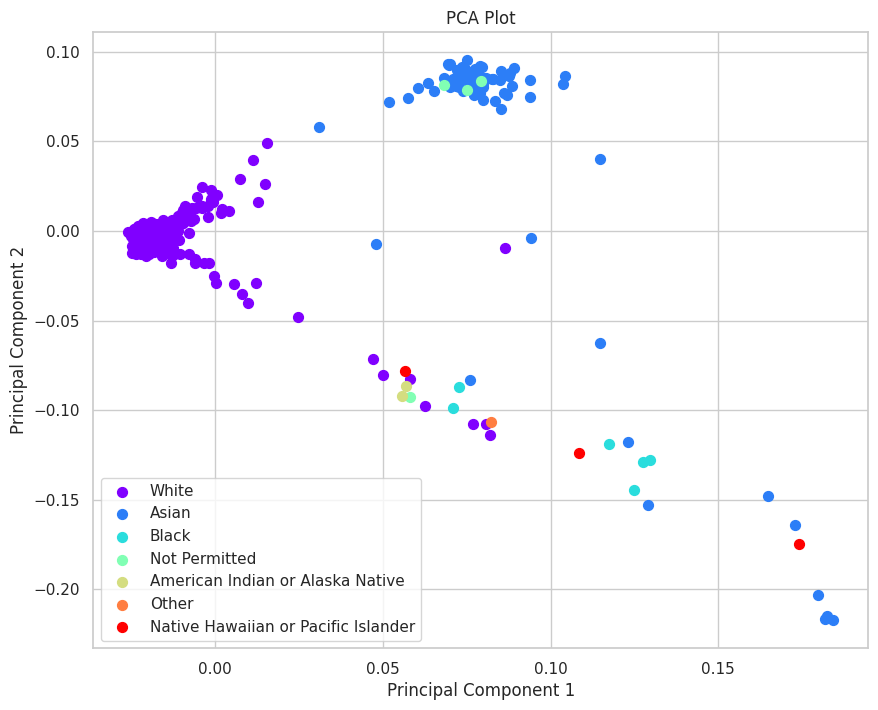

In [6]:
PCs = pd.read_csv('boson_vcf/covar.factor.txt', sep = ' ', header = None)
PCs.columns = ['FID', 'IID', 'sex', 'age'] + ['PC' + str(i) for i in range(1,11)]

df = pd.read_csv('boson_metadata/Boson_data.csv', sep = ',')
df['patient_id'] = 'BOSON' + df['patient_id'].astype(str)

pca = pd.merge(PCs[['FID'] + ['PC' + str(i) for i in range(1,5)]], df[['patient_id', 'Race']], left_on = 'FID', right_on = 'patient_id').drop(columns = 'patient_id')

plt.figure(figsize=(10, 8))

labels = pca['Race']
targets = labels.unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets, colors):
    indices_to_keep = labels == target
    plt.scatter(
        pca.loc[indices_to_keep, 'PC1'],
        pca.loc[indices_to_keep, 'PC2'],
        color=color,
        label=target,
        s=50,
    )
plt.legend()

plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
# plt.show()
plt.savefig('graphs/facs-host/PCA.png', dpi = 300, bbox_inches = "tight")

# FACS Pairplot

In [ ]:
sns.pairplot(df[['CD3+_panel' + str(i+1) for i in range(5)]], kind = 'scatter', corner = True)
plt.savefig('boson_vcf/graphs/CD3+_pairwise.png', dpi = 300, bbox_inches = 'tight')

# Parse Baseline GWAS results

In [ ]:
markers = pd.read_csv('boson_vcf/markers.txt', header = None).rename(columns = {0: 'marker'})
markers = markers.marker.to_list()
for i in markers:
    fs.parse_plink('boson_vcf/results/' + i + '.assoc.linear', True, 'boson_vcf/results/' + i + '.baseline.gwas.txt')